<a href="https://colab.research.google.com/github/HoYoungChun/financial_data_analysis/blob/main/Increasing_amount_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Increasing amount Investment(증액투자법)

In [1]:
import pandas as pd
import requests
from tqdm import tqdm

### Get Daily Prices

#### KODEX 200(Daily)

In [2]:
kodex_200 = pd.DataFrame()

kodex_url = 'https://finance.naver.com/item/sise_day.nhn?code=069500'

for page in tqdm(range(1,100)):
    pg_url = '{url}&page={page}'.format(url=kodex_url, page=page)
    pg_url = requests.get(pg_url, headers={'User-agent':'Mozilla/5.0'}).text
    kodex_200 = kodex_200.append(pd.read_html(pg_url)[0], ignore_index=True)
    #pd.read_html(pg_url)[0]
kodex_200

100%|██████████| 99/99 [00:54<00:00,  1.81it/s]


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.07.14,43325.0,225.0,43400.0,43400.0,43265.0,163470.0
2,2021.07.13,43550.0,365.0,43380.0,43565.0,43380.0,3654600.0
3,2021.07.12,43185.0,385.0,43060.0,43260.0,43060.0,3929269.0
4,2021.07.09,42800.0,460.0,42840.0,43050.0,42445.0,8288519.0
...,...,...,...,...,...,...,...
1480,2017.07.10,31305.0,105.0,31300.0,31390.0,31220.0,4338365.0
1481,2017.07.07,31200.0,125.0,31200.0,31285.0,31115.0,5436532.0
1482,2017.07.06,31325.0,5.0,31395.0,31395.0,31240.0,6394300.0
1483,2017.07.05,31320.0,120.0,31125.0,31355.0,31115.0,5744072.0


In [3]:
kodex_200 = kodex_200.dropna()
kodex_200.columns = ['date','close','over_the_day','open','high','low','volume']
kodex_200.date = pd.to_datetime(kodex_200.date)

print('출처: ', kodex_url)
print(kodex_200.shape)
kodex_200.head()

출처:  https://finance.naver.com/item/sise_day.nhn?code=069500
(990, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,close,over_the_day,open,high,low,volume
1,2021-07-14,43325.0,225.0,43400.0,43400.0,43265.0,163470.0
2,2021-07-13,43550.0,365.0,43380.0,43565.0,43380.0,3654600.0
3,2021-07-12,43185.0,385.0,43060.0,43260.0,43060.0,3929269.0
4,2021-07-09,42800.0,460.0,42840.0,43050.0,42445.0,8288519.0
5,2021-07-08,43260.0,455.0,43765.0,43875.0,43260.0,5209381.0


#### Gov 3-year(Daily)

In [4]:
gov_3 = pd.DataFrame()
gov_url = 'https://finance.naver.com/item/sise_day.nhn?code=114260'

for page in tqdm(range(1,100)):
    pg_url = '{url}&page={page}'.format(url=gov_url, page=page)
    pg_url = requests.get(pg_url, headers={'User-agent':'Mozilla/5.0'}).text
    gov_3 = gov_3.append(pd.read_html(pg_url)[0],ignore_index=True)

100%|██████████| 99/99 [00:52<00:00,  1.87it/s]


In [5]:
gov_3 = gov_3.dropna()
gov_3.columns = ['date','close','over_the_day','open','high','low','volume']
gov_3.date = pd.to_datetime(gov_3.date)
gov_3

,date,close,over_the_day,open,high,low,volume
1,2021-07-14,57895.0,35.0,57900.0,57900.0,57895.0,228.0
2,2021-07-13,57930.0,45.0,57975.0,57980.0,57925.0,973.0
3,2021-07-12,57975.0,40.0,58010.0,58020.0,57945.0,831.0
4,2021-07-09,58015.0,25.0,58015.0,58055.0,57975.0,1069.0
5,2021-07-08,57990.0,70.0,57960.0,58015.0,57930.0,3646.0
...,...,...,...,...,...,...,...
1479,2017-07-11,55430.0,25.0,55455.0,55460.0,55420.0,4616.0
1480,2017-07-10,55455.0,45.0,55385.0,55455.0,55385.0,3542.0
1481,2017-07-07,55410.0,45.0,55445.0,55455.0,55375.0,5008.0
1482,2017-07-06,55455.0,0.0,55460.0,55465.0,55425.0,1594.0


### Turn into Monthly DataFrame

In [6]:
kodex_monthly = pd.DataFrame()
gov_monthly = pd.DataFrame()

In [7]:
for y in range(2017,2022):
    for m in range(1,13):
        kodex_monthly = kodex_monthly.append(kodex_200[(kodex_200['date'].dt.year == y) & (kodex_200['date'].dt.month==m)].head(1))
        gov_monthly = gov_monthly.append(gov_3[(gov_3.date.dt.year==y) & (gov_3.date.dt.month==m)].head(1))


In [8]:
# list comprehension
kodex_monthly.index = [x for x in range(len(kodex_monthly))]
gov_monthly.index = [x for x in range(len(gov_monthly))]

### Backtesting

In [10]:
def backtest(beginning_asset = 100000):
    asset = [beginning_asset]
    kodex_shares = 0

    for i in range(len(gov_monthly)-1):
        gov_shares = beginning_asset / gov_monthly.iloc[i].close #t시점
        gov_ending_value = gov_shares * gov_monthly.iloc[i+1].close #t+1시점

        surplus = gov_ending_value - beginning_asset
        if surplus > 0:
            kodex_shares += surplus / kodex_monthly.iloc[i+1].close #t+1시점
        
        total_ending_value = beginning_asset + kodex_shares * kodex_monthly.iloc[i+1].close
        asset.append(total_ending_value)

    return asset

In [11]:
result = backtest()
result

[100000,
 100071.98128486593,
 100074.06058845343,
 100077.97388453102,
 100439.81312381002,
 100443.12507141517,
 100455.62936339379,
 100793.72045124919,
 100864.18304324958,
 101055.26080145137,
 101215.76557922873,
 101174.52337067289,
 101382.80858863948,
 102077.78264826292,
 102089.22571024434,
 102227.34415513721,
 102633.96742777718,
 102577.71922792037,
 103021.53889690313,
 103133.1657690086,
 103584.12018418516,
 103696.10932761274,
 103873.92557572607,
 104459.98955376256,
 104876.12074340922,
 105108.22742781247,
 105415.21462202496,
 105460.62108804996,
 105803.2606413532,
 106326.82526199525,
 106500.85259015652,
 106709.1781755474,
 105943.01420956451,
 106692.61590562853,
 107485.79807809481,
 107856.47029216788,
 108678.52716355913,
 108914.84522698382,
 109410.12041703038,
 109124.04791279703,
 110499.92043315744,
 112000.60911964206,
 112606.2678583398,
 112784.05838375833,
 112931.1953703116,
 113059.76637999018,
 113203.34815955503,
 113553.81121290149,
 113576.8

In [12]:
back_test = {
    'date': gov_monthly.date,
    'backtest' : result,
    'KODEX_200' : kodex_monthly.close / kodex_monthly.iloc[0].close*100000,
    'GOV_3Y': gov_monthly.close / gov_monthly.iloc[0].close * 100000
}

In [13]:
back_test = pd.DataFrame(back_test)
back_test

,date,backtest,KODEX_200,GOV_3Y
0,2017-07-31,100000.000000,100000.000000,100000.000000
1,2017-08-31,100071.981285,97933.884298,100071.981285
2,2017-09-29,100074.060588,100762.873490,99550.116970
3,2017-10-31,100077.973885,106087.094723,98929.278388
4,2017-11-30,100439.813124,103417.037508,99289.184812
5,2017-12-28,100443.125071,104195.804196,98902.285406
6,2018-01-31,100455.629363,107136.045772,98515.386000
7,2018-02-28,100793.720451,100731.087095,98875.292424
8,2018-03-30,100864.183043,101589.319771,98938.276048
9,2018-04-30,101055.260801,102670.057216,99118.229260


## Visualization

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

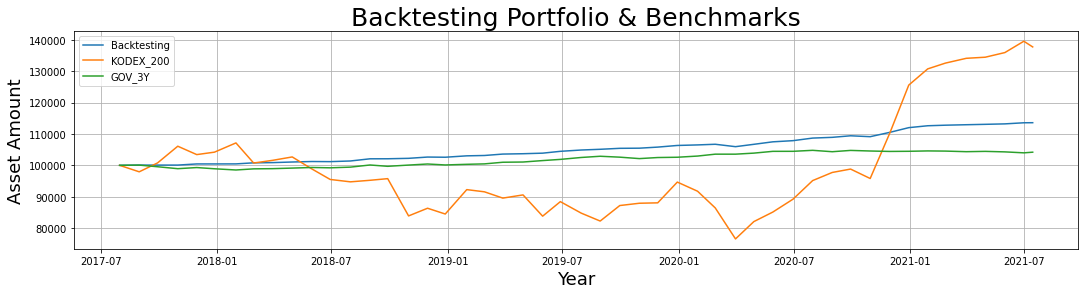

In [18]:
plt.figure(figsize=(18,4))
plt.plot(back_test.date,back_test.backtest, label='Backtesting')
plt.plot(back_test.date,back_test.KODEX_200, label='KODEX_200')
plt.plot(back_test.date,back_test.GOV_3Y, label='GOV_3Y')

plt.legend(loc='best')
plt.grid()
plt.title('Backtesting Portfolio & Benchmarks', fontsize = 25)
plt.xlabel('Year', fontsize= 18)
plt.ylabel('Asset Amount',fontsize = 18)

plt.show()

## Compute CAGR

In [21]:
start, end = result[0], result[-1]
cagr = ((end/start)**(1/len(set(kodex_monthly.date.dt.year))) - 1) * 100
print("%.2f" % cagr, "%")

2.58 %


In [23]:
start, end = kodex_monthly.iloc[0].close, kodex_monthly.iloc[-1].close
cagr = ((end/start)**(1/len(set(kodex_monthly.date.dt.year))) - 1) * 100
print("%.2f" % cagr, "%")

6.61 %


In [24]:
start, end = gov_monthly.iloc[0].close, gov_monthly.iloc[-1].close
cagr = ((end/start)**(1/len(set(kodex_monthly.date.dt.year))) - 1) * 100
print("%.2f" % cagr, "%")

0.82 %


## Compute Statistics

In [25]:
import numpy as np

In [26]:
# numpy -> 모집단 표준편차(N)
np.std(back_test)

backtest      4340.725937
KODEX_200    16633.826355
GOV_3Y        2156.567235
dtype: float64

In [27]:
# pandas -> 표본 표준편차(n-1)
back_test.std()

backtest      4385.708754
KODEX_200    16806.202217
GOV_3Y        2178.915679
dtype: float64

In [28]:
back_test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


backtest     105427.454874
KODEX_200     99994.810384
GOV_3Y       101887.856096
dtype: float64

In [29]:
back_test.std() / back_test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


backtest     0.041599
KODEX_200    0.168071
GOV_3Y       0.021385
dtype: float64

In [45]:
back_test['RoR'] = back_test.backtest.diff() / back_test.backtest * 100
back_test['KODEX_RoR'] = back_test.KODEX_200.diff() / back_test.KODEX_200 * 100
back_test['GOV_RoR'] = back_test.GOV_3Y.diff() / back_test.GOV_3Y * 100

In [46]:
back_test = back_test.fillna(0)
back_test

,date,backtest,KODEX_200,GOV_3Y,RoR,KODEX_200_RoR,GOV_3Y_RoR,KODEX_RoR,GOV_RoR
0,2017-07-31,100000.000000,100000.000000,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-08-31,100071.981285,97933.884298,100071.981285,0.071930,-2.109705,0.071930,-2.109705,0.071930
2,2017-09-29,100074.060588,100762.873490,99550.116970,0.002078,2.807571,-0.524223,2.807571,-0.524223
3,2017-10-31,100077.973885,106087.094723,98929.278388,0.003910,5.018727,-0.627558,5.018727,-0.627558
4,2017-11-30,100439.813124,103417.037508,99289.184812,0.360255,-2.581835,0.362483,-2.581835,0.362483
5,2017-12-28,100443.125071,104195.804196,98902.285406,0.003297,0.747407,-0.391194,0.747407,-0.391194
6,2018-01-31,100455.629363,107136.045772,98515.386000,0.012448,2.744400,-0.392730,2.744400,-0.392730
7,2018-02-28,100793.720451,100731.087095,98875.292424,0.335429,-6.358473,0.364000,-6.358473,0.364000
8,2018-03-30,100864.183043,101589.319771,98938.276048,0.069859,0.844806,0.063660,0.844806,0.063660
9,2018-04-30,101055.260801,102670.057216,99118.229260,0.189082,1.052632,0.181554,1.052632,0.181554


In [47]:
back_test.std() / back_test.mean() * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


backtest            4.159930
KODEX_200          16.807074
GOV_3Y              2.138543
RoR               131.164456
KODEX_200_RoR    1005.020631
GOV_3Y_RoR        395.428132
KODEX_RoR        1005.020631
GOV_RoR           395.428132
dtype: float64

In [50]:
back_test[back_test.RoR == max(back_test.RoR)].date

41   2020-12-30
Name: date, dtype: datetime64[ns]

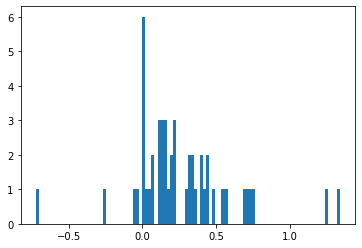

In [53]:
plt.figure()

plt.hist(back_test.RoR, bins=100)

plt.show()